#import important liabraries

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Load the train and test datasets

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


#Combine test and train into one file

In [3]:
data = pd.concat([train, test])
print(train.shape, test.shape, data.shape)

(8523, 12) (5681, 11) (14204, 12)



#Step 1 :Pre-processing-Handle missing values
#You can replace missing values with mean, median, mode, or using more advanced techniques

#Check for categorial attribute

In [4]:
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [5]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

#Step 2: fill the missing values

In [6]:
item_weight_mean = data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [7]:
miss_bool = data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 14204, dtype: bool

#filling missing values of continuous variables with mean

In [8]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Item_Outlet_Sales'].fillna(data['Item_Outlet_Sales'].mean(), inplace=True)

#checking missing values after imputation

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#filling missing values of categorical variables with mode

In [10]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

#checking missing values after imputation

In [11]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
sum(data['Item_Visibility']==0)

879

#replace zeros with mean

In [13]:
data.loc[:, 'Item_Visibility'].replace([0], [data['Item_Visibility'].mean()], inplace=True)

In [14]:
sum(data['Item_Visibility']==0)

0

#combine item fat content

In [15]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

#Creation of new attributes

In [16]:
data['New_Item_Type'] = data['Item_Identifier'].apply(lambda x: x[:2])

In [17]:
data['New_Item_Type'] = data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [18]:
data.loc[data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

#Label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    data[col] = le.fit_transform(data[col])

#Onehot encoding

In [20]:
data = pd.get_dummies(data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Item_Fat_Content_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,9,True,...,True,False,False,False,True,False,False,False,True,False
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,3,False,...,False,False,True,False,False,True,False,True,False,False
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,9,True,...,True,False,False,False,True,False,False,False,True,False
3,FDX07,19.20,0.065953,6,182.0950,OUT010,1998,732.3800,0,False,...,False,False,True,True,False,False,False,False,True,False
4,NCD19,8.93,0.065953,9,53.8614,OUT013,1987,994.7052,1,False,...,False,False,True,False,True,False,False,False,False,True


#Input split

In [21]:
X = data.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = data['Item_Outlet_Sales']

#Model traing

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 1155284.560525808
CV Score: 1377774.7060349798


<Axes: title={'center': 'Model Coefficients'}>

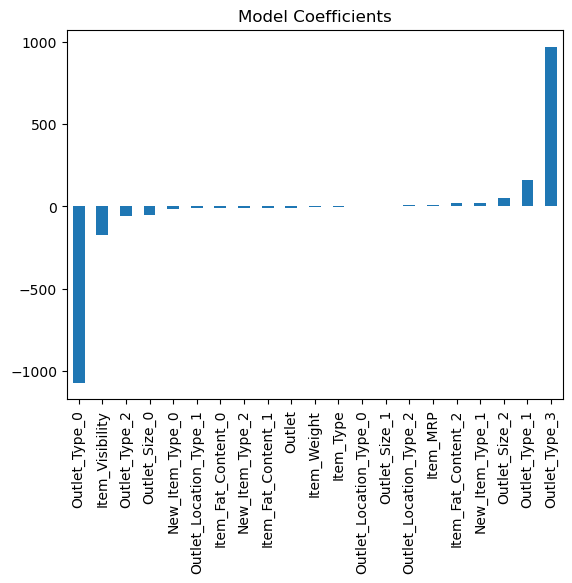

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1155284.8040461445
CV Score: 1377678.7786903193


<Axes: title={'center': 'Model Coefficients'}>

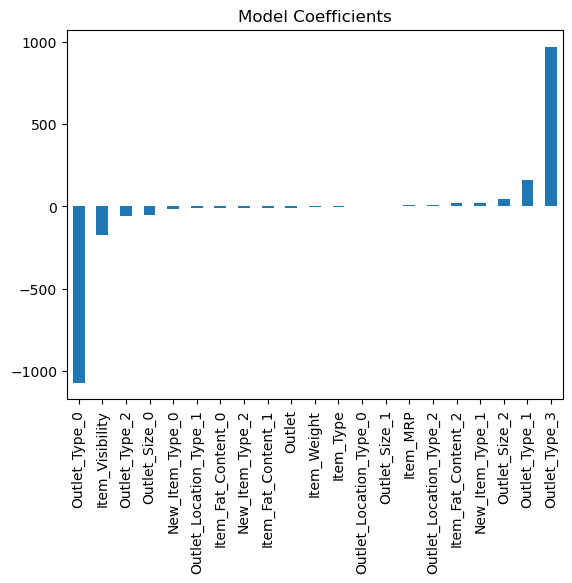

In [24]:
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1.0446037903175116e-27
CV Score: 2549814.677792789


<Axes: title={'center': 'Feature Importance'}>

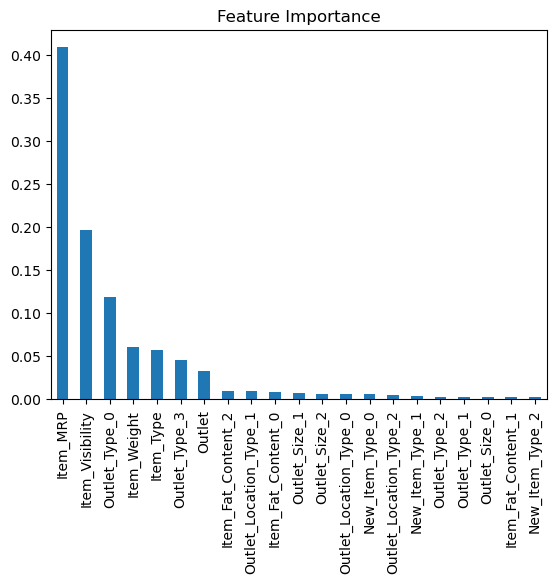

In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

#Create training and validation model

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shape of training and validation set

In [ ]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

In [ ]:
!pip install tensorflow


In [ ]:
!pip install keras

#importing the sequential model

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import InputLayer, Dense 

#defining input neurons

In [ ]:
input_neurons = X_train.shape[1]

#define number of output neurons

In [ ]:
output_neurons = 1

#Define model

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=22, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary()

#2nd architecture

#define hidden layers and neuron in each layer

In [ ]:
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

#defining the architecture of the model

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='relu'))
model.summary()

#Compiling the model

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model_history =model.fit(X_train, y_train, epochs=20)

#Generate predictions 

In [ ]:
test_predictions = model.predict(X)
test_predictions

pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

#Create a DataFrame to store predictions

In [ ]:
predictions_df = pd.DataFrame({
    'Item_Identifier': X_val['Item_Identifier'],
    'Outlet_Identifier': X_val['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

#Save predictions to a CSV file

In [ ]:
predictions_df.to_csv('test_predictions.csv', index=False)